# DATA WRANGLING PROJECT

## Project pipeline.

The dataset that we will be wrangling is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent."
#### Below is a list of the wrangling process.

<ul>
    <li>Gathering data</li>
    <li>Assessing data</li>
    <li>Cleaning data</li>
    <li>Storing, analyzing, and visualizing the wrangled data.</li>
</ul>

## 1.Gathering
 Data for this project is composed from three pieces of data.
 <ul>
    <li>Twitter achived enhanced (CSV) downloaded from the classrom</li>
    <li>image prediction (TSV) Programatically downloaded using the Request library</li>
    <li>Additional data collected using twitter's API library (tweepy).</li>
 </ul>   

In [5]:
# Import the libraries that we will need in this project
import pandas as pd
import datetime as dt
import numpy as np
import requests
import tweepy
import json
import re
import time

In [6]:
# Read the twitter-archive-enhanced.csv file 
df_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')
# display the first five rows
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
# Using Requests library to download a file then store it in a tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)

# Read the downloaded file into a dataframe 'images'
df_images = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')
#display the fisrt five rows 
df_images.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
consumer_key = 'pAteJtvSgAg7StIgIDXud4RSR'
consumer_secret = 'cdzUYYt6otAITnKCOHm5WDRa5PseCxDP47eVjf1aOYxcMnQn5w'
access_token = '558867144-TJUPmPQeiFtZR6aPK2oQEdXRhXWLQ4jNDLNX1F7B'
access_secret = 'xmvCHVIAibbi6H5BgP4efdK2btQVx2DIje8g9stLXfwbo'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True) 

In [ ]:
df_list = []

error_list = []

# Calculate the time of excution
start = time.time()

# Get the tweet object for all the teweets in archive dataframe 
for tweet_id in df_archive['tweet_id']:
    try:
        page = api.get_status(tweet_id, tweet_mode = 'extended')
        
        favorites = page['favorite_count'] 
        retweets = page['retweet_count'] 
        user_followers = page['user']['followers_count'] 
        user_favourites = page['user']['favourites_count'] 
        date_time = page['created_at'] 
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorite_count': int(favorites),
                        'retweet_count': int(retweets),
                        })
    
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)

# Calculate the time of excution
end = time.time()
print(end - start)

In [9]:
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])
# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [10]:
# Read the saved tweet_json.txt file into a dataframe
json_tweets = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

## 2. Assessing the Data.
 After gathering all three pieces of data, the above data will be assessed visually and programatically for quality and tidiness issues.

In [11]:
#display the entire row in df_archive
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [14]:
#display useful descriptive statistics for each column of data in df_archive
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
df_archive.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1164,723179728551723008,NaN,NaN,2016-04-21 16:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jangle. She's addicted to broccoli. It...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/723179728...,8,10,Jangle,None,None,None,None
862,762699858130116608,NaN,NaN,2016-08-08 17:19:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leela. She's a Fetty Woof. Lost eye wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762699858...,11,10,Leela,None,None,None,None
1765,678410210315247616,NaN,NaN,2015-12-20 03:02:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jerome. He can shoot french fries...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678410210...,10,10,Jerome,None,None,None,None
253,844704788403113984,NaN,NaN,2017-03-23 00:18:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. It's her first time outside and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,None,None,None,None


In [16]:
#value count for rating_numerator in df_archive
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [17]:
#value count for rating_denominator in df_archive
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [18]:
#valuecount for name in df_archive
df_archive['name'].value_counts().sort_index(ascending=False)

very            5
unacceptable    1
this            1
the             8
such            1
               ..
Aiden           1
Adele           1
Acro            1
Ace             1
Abby            2
Name: name, Length: 957, dtype: int64

In [19]:
#displays the consice summary that includes the number of null values in each column of df_images.
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
sum(df_images.jpg_url.duplicated())

66

In [21]:
#value_counts for jpg_yrl in df_images.
df_images.jpg_url.value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

In [22]:
#display the entire data in df_images
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [23]:
#dispaly the entire dataset in json_tweets
json_tweets

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [24]:
#display summary of the datframr json_tweets
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [25]:
#value counts for the tweet_id column
json_tweets.tweet_id.value_counts()

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
774757898236878852    1
774639387460112384    1
774314403806253056    1
773985732834758656    1
666020888022790149    1
Name: tweet_id, Length: 2354, dtype: int64

In [26]:
#value counts for the favorite column
json_tweets.favorite_count.value_counts()

0       179
2706      3
2918      3
610       3
2768      3
       ... 
7493      1
6671      1
4484      1
2872      1
2535      1
Name: favorite_count, Length: 2007, dtype: int64

In [27]:
#value counts for the retweet count column
json_tweets.retweet_count.value_counts()

1972    5
3652    5
83      5
1207    4
336     4
       ..
3357    1
3018    1
2181    1
848     1
147     1
Name: retweet_count, Length: 1724, dtype: int64

### Quality.
The dimension of the data quality are; Accuracy, Completeness, Consistency and Validity.

- Remove retweeted tweet.
- Timestamp should be a datetime dtype instead of object which is a string in python
- Name column have invalid names like none, a and an.
- We may change the dtype in the columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,      retweeted_status_user_id and tweet_id) to object which is a string in python because We don't want any action to be performed   on them
- Some of the rating denominator columns have invalid values i.e not 10
- There are several null values in several columns.
- drop the retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp column.
- There are underscores found in many of the predictions.

### Tidiness

 ### untidy data.
 - The columns p1_dog, p2_dog, p3_dog should be staged as one column
 - The doggo, floofer, pupper, and puppo, should be staged as one column.
 - merge the three dataframe including all important columns. 


## 3. Cleaning Data.
Here, all the issues listed in the accessing section will be cleaned.

#### Make a copy of the DataFrames

In [28]:
# Making copies of original pieces of data
df1_archive = df_archive.copy()
df2_images = df_images.copy()
df3_json_tweets = json_tweets.copy()

#### Define
- Remove retweeted tweet

#### Code

In [29]:
#remove retweeted tweets
df1_archive = df1_archive[df1_archive.retweeted_status_user_id.isna()]

#### Test

In [30]:
df1_archive.retweeted_status_user_id.unique()

array([nan])

#### Define
- Change datatype timestamp to datetime

#### Code

In [31]:
#changing the dtype in timestamp column of df1_archive from object to datetime
df1_archive['timestamp'] = pd.to_datetime(df1_archive['timestamp'])
type(df1_archive['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### Test

In [32]:
#check the timestamp dtype
df1_archive.timestamp.info()

<class 'pandas.core.series.Series'>
Int64Index: 2175 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2175 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 98.5 KB


#### Define 
- Change datatype to object

#### Code

In [33]:
df1_archive['in_reply_to_status_id'] = df1_archive['in_reply_to_status_id'].astype(object)
df1_archive['in_reply_to_user_id'] = df1_archive['in_reply_to_user_id'].astype(object)
df1_archive['tweet_id'] = df1_archive['tweet_id'].astype(object)
df1_archive['retweeted_status_id'] = df1_archive['retweeted_status_id'].astype(object)
df1_archive['retweeted_status_user_id'] = df1_archive['retweeted_status_user_id'].astype(object)

#### Test

In [34]:
df1_archive.dtypes

tweet_id                                   object
in_reply_to_status_id                      object
in_reply_to_user_id                        object
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                        object
retweeted_status_user_id                   object
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

#### Define
- Replace `None`, `a` and `an` with `nan`

#### Code

In [35]:
#check for null values
df1_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   58
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [36]:
#replacing none,a and an in the name column to nan
df1_archive['name'].replace(['a', 'an', 'None'], value = np.nan, inplace = True)

#### Test

In [37]:
df1_archive.name.value_counts()

Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 953, dtype: int64

In [38]:
df1_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Define
- Replace rating denominators to be `10`.

In [39]:
#let all denominator be 10.
df1_archive['rating_denominator'] = 10

In [40]:
df1_archive.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

#### Define
- Replace `_` with space

#### Code

In [41]:
df2_images['p1'] = df2_images['p1'].str.replace('_', ' ')
df2_images['p2'] = df2_images['p2'].str.replace('_', ' ')
df2_images['p3'] = df2_images['p3'].str.replace('_', ' ')

#### Test

In [42]:
df2_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define
- Drop 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'

#### Code

In [43]:
#drop columns with retweet
df1_archive.drop(['retweeted_status_id',
                  'retweeted_status_user_id',   
                  'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [44]:
#check the rows in df1_archive
list(df1_archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Define
- Stage doggo, floofer, pupper and puppo as one column

#### Code

In [45]:
#create a new column and include the different dog type in it as a sinle column.
df1_archive['dog_type'] = df1_archive['doggo'] + df1_archive['floofer'] + df1_archive['pupper'] + df1_archive['puppo']

In [46]:
df1_archive['dog_type'].replace('NoneNoneNoneNone', np.nan, inplace=True)
df1_archive['dog_type'].replace('doggoNoneNoneNone', 'doggo', inplace=True)
df1_archive['dog_type'].replace('NoneNoneNonepuppo', 'puppo', inplace=True)
df1_archive['dog_type'].replace('NoneNonepupperNone', 'pupper', inplace=True)
df1_archive['dog_type'].replace('NoneflooferNoneNone', 'floofer', inplace=True)
df1_archive['dog_type'].replace('doggoNoneNonepuppo', np.nan, inplace=True)
df1_archive['dog_type'].replace('doggoflooferNoneNone', np.nan, inplace=True)
df1_archive['dog_type'].replace('doggoNonepupperNone', np.nan, inplace=True)

#### Test

In [47]:
df1_archive.dog_type.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

#### Define 
- Remove columns already staged as one.

#### Code

In [48]:
df1_archive.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [49]:
#test
df1_archive.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


#### Define
- Stage 'p1_dog', 'p2_dog', 'p3_dog' columns as one

#### Code

In [50]:
#Create a new column to comine the 3 dog prediction result.
df2_images['dog'] = df2_images.p1_dog + df2_images.p2_dog + df2_images.p3_dog
df2_images.drop(columns = ['p1_dog', 'p2_dog', 'p3_dog'], inplace=True)
df2_images = df2_images [df2_images['dog'] == True]


#### Test

In [51]:
df2_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,collie,0.156665,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,miniature pinscher,0.074192,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,malinois,0.138584,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,redbone,0.360687,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,Rottweiler,0.243682,Doberman,0.154629,True


#### Define
- Merge df1_archive and df3_json_tweet dataframe as one

#### Code

In [52]:
#merge the df1_archive with the df3_json_tweets dataframe
df1_archive = pd.merge(left=df1_archive, right=df3_json_tweets, how='left', left_on='tweet_id', right_on='tweet_id')

#### Test

In [53]:
df1_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819,6514


#### Define
- Merge df1_archive with df2_image

#### Code

In [54]:
#create a dataframe with the'tweet_id', 'p1', 'p2', 'p3', 'dog' column in df2_images
image_df4 = df2_images[['tweet_id', 'p1', 'p2', 'p3', 'dog']]

In [55]:
#merge df1_archive with the image_df4
df1_archive = pd.merge(left=df1_archive, right=image_df4, how='left', left_on='tweet_id', right_on='tweet_id')

#### Test

In [56]:
#test
df1_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count,p1,p2,p3,dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,8853,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819,6514,Chihuahua,Pekinese,papillon,True


#### Store Master Data

In [57]:
#storing data
df1_archive.to_csv('twitter_archive_master.csv', index = False)

## Act report
- How did the retweet count improve over time?
- How did the favorite count improve over time?
- Analyzing number of tweets posted by WeRateDogs' over time

In [58]:
# Load data and view a few lines
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count,p1,p2,p3,dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,8853,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819,6514,Chihuahua,Pekinese,papillon,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25461,4328,Chihuahua,malamute,kelpie,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42908,8964,paper towel,Labrador retriever,spatula,True
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,41048,9774,basset,English springer,German short-haired pointer,True


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   1434 non-null   object 
 10  dog_type               332 non-null    object 
 11  favorite_count         2175 non-null   int64  
 12  retweet_count          2175 non-null   int64  
 13  p1                     1686 non-null   object 
 14  p2                     1686 non-null   object 
 15  p3  

In [62]:
#How the retweet count improve over time
#create a column with time and month in it then name it time column.
df['time'] = df['timestamp'].str[:7]

In [63]:
#display the firt two rows
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorite_count,retweet_count,p1,p2,p3,dog,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,8853,NaN,NaN,NaN,NaN,2017-08
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819,6514,Chihuahua,Pekinese,papillon,True,2017-08


In [64]:
#How did the retweet count improve over time
df.groupby('time')['favorite_count'].mean()

time
2015-11     1230.193333
2015-12     3528.623711
2016-01     4040.237113
2016-02     4071.632000
2016-03     4610.154412
2016-04     4668.383333
2016-05     6143.283333
2016-06     9109.946809
2016-07     7377.835052
2016-08     9890.238095
2016-09    11103.753623
2016-10    13651.904110
2016-11    13760.103448
2016-12    16038.372881
2017-01    18553.014085
2017-02    17182.125000
2017-03    19279.421053
2017-04    20311.979592
2017-05    27822.000000
2017-06    27724.900000
2017-07    31202.169811
2017-08    36643.000000
Name: favorite_count, dtype: float64

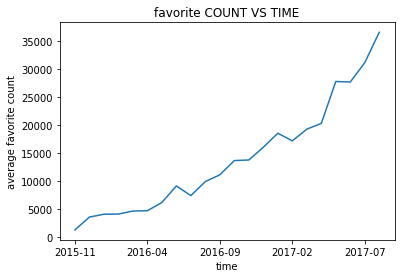

In [65]:
df.groupby('time')['favorite_count'].mean().plot(kind = 'line', ylabel = 'average favorite count', title = 'favorite COUNT VS TIME');

In [66]:
#How did the favorite count improve over time
df.groupby('time')['favorite_count'].mean()

time
2015-11     1230.193333
2015-12     3528.623711
2016-01     4040.237113
2016-02     4071.632000
2016-03     4610.154412
2016-04     4668.383333
2016-05     6143.283333
2016-06     9109.946809
2016-07     7377.835052
2016-08     9890.238095
2016-09    11103.753623
2016-10    13651.904110
2016-11    13760.103448
2016-12    16038.372881
2017-01    18553.014085
2017-02    17182.125000
2017-03    19279.421053
2017-04    20311.979592
2017-05    27822.000000
2017-06    27724.900000
2017-07    31202.169811
2017-08    36643.000000
Name: favorite_count, dtype: float64

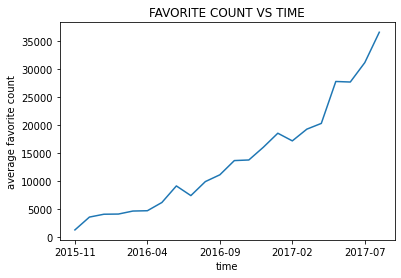

In [67]:
df.groupby('time')['favorite_count'].mean().plot(kind = 'line', ylabel = 'average favorite count', title = 'FAVORITE COUNT VS TIME');

In [68]:
# Aggregate the number of tweets per month.
df_tweet_time = df.groupby('time', as_index=False)['time'].value_counts()
df_tweet_time.head()

,time,count
0,2015-11,300
1,2015-12,388
2,2016-01,194
3,2016-02,125
4,2016-03,136


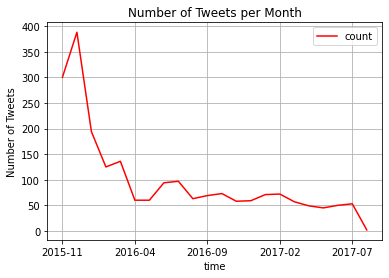

In [69]:
# Plot the tweet time on a line chart
df_tweet_time.plot(x='time', y='count', xlabel='time',
                ylabel='Number of Tweets', title='Number of Tweets per Month', grid=True, color='red');

## Conclusion
- The number of retweets decreasees over the years.
- The WeRateDogs twitter page has a decreasing number of tweets over the years. It has a steep drop between the year 2015 and 2016.


There were null values in the dataset that are dropped.
Some observations are invalid and were dropped in the process of wrangling.